In [1]:
# Renaming the resumes

import os
#path = '/home/ravikrishnak/Desktop/REsume classification/New_Data_Test/'
for root, dirs, files in os.walk("/home/ravikrishnak/Desktop/Data"):
    if not files:
        continue
    prefix = os.path.basename(root)
    #print(prefix)
    for f in files:
        os.rename(os.path.join(root, f), os.path.join(root, "{}{}".format(prefix, f)))


In [2]:
!pip install tensorflow==2.2.0
!pip install nltk
!pip install tika
!pip install textblob
!pip3 install --upgrade numpy
!pip install scikit-learn
!pip install natsort

Requirement already up-to-date: numpy in /home/ravikrishnak/anaconda3/lib/python3.8/site-packages (1.19.1)


In [3]:
# To handle Paths
import os

# To remove Hyperlinks and Dates
import re

# To remove Puncutations
import string

# For Tokenization and Accessing Stopwords
import nltk

# To Parse the Input Data Files
from tika import parser

#natural sorting in Python.
from natsort import natsorted

#library for processing textual data
from textblob import TextBlob

# In order to use the Libraries of Tensorflow
import tensorflow as tf

# For Preprocessing the Text => To Tokenize the Text
from tensorflow.keras.preprocessing.text import Tokenizer

# If the Two Articles are of different length, pad_sequences will make the length equal
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Package for performing Numerical Operations
import numpy as np

# MatplotLib for Plotting Graphs
import matplotlib.pyplot as plt

# To shuffle the Data
from random import shuffle

# To Partition the Data into Train Data and Test Data
from sklearn.model_selection import train_test_split

# To add Regularizer in order to reduce Overfitting
from tensorflow.keras.regularizers import l2

#Pandas- data manipulation and processing
import pandas as pd

#Numpy - support for large, multi-dimensional arrays and matrices
import numpy

In [4]:
tf.__version__

'2.2.0'

In [5]:
# Give the Path of our Data
Path_Of_Data = '/home/ravikrishnak/Desktop/REsumeclassification/New_Data_Test'

# Extract the Labels from the Folders inside the Path mentioned above
Unique_Labels_List = os.listdir(Path_Of_Data)
print(Unique_Labels_List)

['Civil', 'Python', 'SAP', 'Mechanical', 'Networking', 'Testing']


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
## This helps to remove the unnecessary words from our Text Data
nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ravikrishnak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ravikrishnak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(STOPWORDS)
type(STOPWORDS)

{'ll', 're', 'weren', 'ourselves', 'with', "wasn't", 'haven', 'himself', 'out', "won't", 'o', 'they', 'where', 'how', 'into', "needn't", 'wasn', 'both', "it's", 'again', 'other', 'i', 'because', "haven't", 'own', 'further', 'hadn', 'can', 'me', "you're", 'after', 'had', 'have', 'them', 's', 'does', 'all', 'her', 'by', 'between', 'these', 'that', 'very', 'she', 'should', 'couldn', "hasn't", 'its', 'do', 'on', "shan't", 'it', 'once', 'doing', "doesn't", 'is', 'whom', 'over', 'while', 'wouldn', 'theirs', "aren't", 'are', 'of', 'but', "that'll", 'be', 'if', 'most', 'then', "mightn't", 'only', 'and', 'hers', 'mustn', 'this', 'why', 'their', 'd', 'as', "you'd", 'am', 'when', 'doesn', "isn't", 'under', 'won', 'did', "should've", 'itself', "mustn't", 'your', 'each', 've', 'than', 'ours', 'aren', "wouldn't", 'too', 'some', 'below', 'shouldn', 'more', 'ain', 'm', 'yours', 'isn', 'having', 'above', 'you', 'same', 'being', "weren't", 'y', 'until', "don't", 'through', 'our', 'him', 'has', 'such', '

set

In [10]:
def Pre_Process_Data_And_Create_BOW(folder_path):
  #creating empty lists in order to Create Resume Text and the respective Label
  Resumes_List = [] 
  Labels_List = []
  for EachLabel in Unique_Labels_List:      
      for root, dirs, files in os.walk(os.path.join(folder_path, EachLabel),topdown=False):
        for file in files:
          i = 0
          if file.endswith('.pdf'):
            Full_Resume_Path = os.path.join(root, file)
            file_data = parser.from_file(Full_Resume_Path)
            Resume_Text = file_data['content']
            
            # Below Code removes the Hyperlinks in the Resume, like LinkedIn Profile, Certifications, etc..
            HyperLink_Regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
            Text_Without_HL = re.sub(HyperLink_Regex, ' ', Resume_Text, flags=re.MULTILINE)

            # Below Code removes the Date from the Resume
            Date_regEx = r'(?:\d{1,2}[-/th|st|nd|rd\s]*)?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)?[a-z\s,.]*(?:\d{1,2}[-/th|st|nd|rd)\s,]*)+(?:\d{2,4})+'
            CleanedText = re.sub(Date_regEx,' ',Text_Without_HL)

            List_Of_All_Punctuations = list(string.punctuation)
            Important_Punctuations = ['#', '.', '+' , '-'] #Add more, if any other Punctuation is observed as Important
            NewLineChar = '\n'
            Total_Punct = len(List_Of_All_Punctuations)
            for EachImpPunct in Important_Punctuations:
                for CountOfPunct in range(Total_Punct):
                    if CountOfPunct == Total_Punct:
                        break
                    elif EachImpPunct == List_Of_All_Punctuations[CountOfPunct]:
                        del List_Of_All_Punctuations[CountOfPunct]
                        Total_Punct = Total_Punct - 1
            List_Of_All_Punctuations.append(NewLineChar)
            for EachPunct in List_Of_All_Punctuations:
                CleanedText = CleanedText.replace(EachPunct, " ")
            
            Final_Cleaned_Resume_Text = CleanedText.lower()
            for word in STOPWORDS:
                stop_token = word
                Resume_Text = Final_Cleaned_Resume_Text.replace(stop_token, ' ')
            Resumes_List.append(Resume_Text)
            Labels_List.append(EachLabel)
  return Resumes_List, Labels_List

In [11]:
#calling the function and passing the path
Resumes_List,  Labels_List = Pre_Process_Data_And_Create_BOW(Path_Of_Data)

2020-09-02 12:01:45,216 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-09-02 12:02:03,314 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-09-02 12:02:05,485 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [12]:
Resumes_List[0]

'                            current designation  not workin  current comp   not working  current location  ratnagiri  pref. location  japan kuwait  functional area  site engineering   project management  role  construction-construction management  industry  oil and gas power infrastructure energy  marital status  married  total experience  13 year s  0 month s   notice period  15 days or less  highest degree  pg diploma  civil   verified   phone number    email - id  id   a  last active  17-feb-20 last modified  13-feb-20  not working as not workin   to till date  fluor daniel as civil superintendent   to         managed the selection of construction material   ensured that the selected material is approved as per project  shuaibuddin naimuddin panchbhai  civil superintendent seeking roles in project management construction  management contract management quality management site administration safety  management civil engineering tendering resource utilization techno-commercial  manag

In [13]:
resumes = list (zip(Resumes_List,  Labels_List))

In [14]:
df = pd.DataFrame(resumes)

In [20]:
print(df)

                                                      0        1
0                                 current designatio...    Civil
1                                 current designatio...    Civil
2        …   … 1 2  current designation  engineer ci...    Civil
3        …   … 1 2  current designation  deputy mana...    Civil
4        …   … 1 2  current designation  civil engin...    Civil
...                                                 ...      ...
1958     …   … 1 3  current designation  software te...  Testing
1959     …   … 1 3  current designation  software te...  Testing
1960     …   … 1 6  current designation  software te...  Testing
1961     …   … 1 2  current location  bengaluru   ba...  Testing
1962     …   … 1 2  current designation  automation ...  Testing

[1963 rows x 2 columns]


In [26]:
df.to_csv("/home/ravikrishnak/Desktop/Data/test.csv",sep=",")

In [23]:
pwd

'/home/ravikrishnak/Desktop/REsumeclassification/Ravi/Ravi_Latest'

In [27]:
print("Total Number of Classes are ", len(Unique_Labels_List))
print("Total Number of Resumes are ", len(Resumes_List))
print("Total Number of Labels are ", len(Labels_List))

Total Number of Classes are  6
Total Number of Resumes are  1963
Total Number of Labels are  1963


In [28]:
# Code to Delete the Duplicate Resumes and the Respective Labels

Total_Number_Of_Resumes = len(Resumes_List)

Count = 0

for Each_Resume in Resumes_List:
    
    for Instance_Count in range(Count+1, Total_Number_Of_Resumes):
        if Instance_Count == Total_Number_Of_Resumes:
            break
        elif Each_Resume == Resumes_List[Instance_Count]:
          del Resumes_List[Instance_Count]
          del Labels_List[Instance_Count]
          Total_Number_Of_Resumes = Total_Number_Of_Resumes - 1
    Count = Count + 1

In [29]:
print("Total Number of Classes are ", len(Unique_Labels_List))
print("Total Number of Unique Resumes are ", len(Resumes_List))
print("Total Number of Unique Labels are ", len(Labels_List))

Total Number of Classes are  6
Total Number of Unique Resumes are  1911
Total Number of Unique Labels are  1911


In [31]:
vocab_size = 5000
#vocab_size = 8000
# We want the Output of the Embedding Layer to be 64
embedding_dim = 64
#max_length = 200
max_length = 800
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
# Taking 80% of the Data as Training Data and remaining 20% will be for Test Data
training_portion = .8

In [32]:
# Size of Train Data is 80% of the Entire Dataset => 0.8 * 2225

Train_Resume_Size = int(len(Resumes_List) * training_portion)
'''
# Extracting Train Data
Train_Resume_Data = Resumes_List[0: Train_Resume_Size]
Train_Labels = Labels_List[0: Train_Resume_Size]

# Extracting Validation Data
Validation_Resume_Data = Resumes_List[Train_Resume_Size:]
Validation_Labels = Labels_List[Train_Resume_Size:]
'''

Train_Resume_Data, Validation_Resume_Data, Train_Labels, Validation_Labels = \
                    train_test_split(Resumes_List, Labels_List, train_size = training_portion, 
                                     shuffle = True
                                     , stratify= Labels_List,random_state=1234)

print('train_size = {}'.format(Train_Resume_Size))
print('Number of Train Resumes = {}'.format(len(Train_Resume_Data)))
print('Number of Train Labels = {}'.format(len(Train_Labels)))
print('Number of Validation Resumes = {}'.format(len(Validation_Resume_Data)))
print('Number of Validation Labels = {}'.format(len(Validation_Labels)))

train_size = 1528
Number of Train Resumes = 1528
Number of Train Labels = 1528
Number of Validation Resumes = 383
Number of Validation Labels = 383


In [33]:
from statistics import mean
print('Average Number of Words in Each Training Resume is {}'.format(mean([len(i) for i in Train_Resume_Data])))

Average Number of Words in Each Training Resume is 5441.409685863874


In [34]:
type(Train_Resume_Data[0])

str

In [35]:
resumes1 = list (zip(Train_Resume_Data,  Train_Labels))

In [36]:
df1 = pd.DataFrame(resumes1)

In [37]:
print(df1)

                                                      0           1
0        …   … 1 3  current designation  integrated ...  Networking
1        …   … 1 2  current designation  project eng...       Civil
2        …   … 1 3  current designation  sap mm srm ...         SAP
3        …   … 1 2  current designation  head archit...  Mechanical
4        …   … 1 2  current designation  technical l...      Python
...                                                 ...         ...
1523                              current designatio...       Civil
1524     …   … 1 3  current designation  senior prog...  Mechanical
1525     …   … 1 1  current designation  big data an...      Python
1526                              current designatio...       Civil
1527     …   … 1 3  current designation  manager-eng...  Mechanical

[1528 rows x 2 columns]


In [38]:
df1.to_csv("/home/ravikrishnak/Desktop/Train_Resume_Data.csv",sep=",")


In [39]:
resumes2 = list (zip(Validation_Resume_Data,  Validation_Labels))

In [40]:
df2 = pd.DataFrame(resumes2)

In [41]:
print(df2)

                                                     0           1
0       …   … 1 3  current designation  software te...     Testing
1       …   … 1 3  current designation  test analys...     Testing
2       …   … 1 4  current designation  senior cons...  Networking
3       …   … 1 3  current designation  dcs operato...         SAP
4       …   … 1 3  current designation  senior sofw...     Testing
..                                                 ...         ...
378     …   … 1 3  current designation  associate c...     Testing
379     …   … 1 3  current designation  chief execu...  Mechanical
380                              current designatio...       Civil
381     …   … 1 3  current designation  sap fico co...         SAP
382     …   … 1 4  current designation  sap certifi...         SAP

[383 rows x 2 columns]


In [42]:
df2.to_csv("/home/ravikrishnak/Desktop/Validation_Resume_Data.csv",sep=",")

In [43]:
print("Number of Unique Training Labels = {}".format(len(set(Train_Labels))))
print("Number of Unique Validation Labels = {}".format(len(set(Validation_Labels))))

Number of Unique Training Labels = 6
Number of Unique Validation Labels = 6


In [44]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(Train_Resume_Data)       
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])


{'<OOV>': 1,
 'and': 2,
 'of': 3,
 'the': 4,
 'to': 5,
 'in': 6,
 'for': 7,
 'project': 8,
 's': 9,
 'management': 10}

In [45]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
type(tokenizer)

keras_preprocessing.text.Tokenizer

In [47]:
type(word_index)

dict

In [48]:
# Convert the Word Tokens into Integer equivalents, before passing it to keras embedding layer
train_sequences = tokenizer.texts_to_sequences(Train_Resume_Data)
#print(train_sequences[10])

from statistics import mean

# To calculate the average length of all the Train Resumes
print('Average Number of Words in Each Training Resume is {}'.format(mean([len(i) for i in train_sequences])))

Average Number of Words in Each Training Resume is 754.8678010471205


In [37]:
print(train_sequences[10])

[23, 23, 55, 31, 43, 161, 2, 101, 234, 33, 157, 43, 5, 97, 1, 43, 14, 49, 2, 228, 178, 14, 49, 2, 315, 228, 377, 602, 53, 32, 118, 30, 9, 35, 242, 22, 7, 52, 48, 157, 84, 157, 115, 30, 9, 35, 9, 35, 103, 183, 57, 285, 320, 8, 125, 24, 284, 41, 9, 51, 10, 47, 9, 2, 179, 117, 25, 336, 504, 7, 523, 165, 162, 21, 84, 21, 67, 295, 333, 323, 258, 2, 166, 146, 91, 150, 153, 39, 1, 19, 101, 234, 33, 157, 8, 116, 76, 101, 234, 33, 157, 101, 234, 433, 14, 1, 1, 38, 1, 73, 19, 184, 7, 4, 13, 157, 8, 11, 9, 52, 101, 234, 994, 12, 11, 1799, 2, 39, 1, 46, 134, 675, 46, 10, 159, 675, 1, 3021, 2711, 88, 4458, 184, 7, 4, 13, 157, 101, 234, 33, 157, 101, 234, 22, 187, 431, 33, 94, 33, 522, 38, 321, 14, 1304, 321, 365, 14, 225, 22, 1085, 22, 442, 14, 225, 2121, 442, 607, 442, 443, 9, 1, 358, 95, 58, 184, 7, 5, 191, 101, 234, 33, 42, 22, 647, 101, 234, 22, 187, 431, 33, 94, 33, 522, 38, 321, 14, 1304, 321, 365, 1085, 22, 442, 14, 225, 2121, 442, 607, 442, 443, 9, 1, 358, 14, 225, 22, 99, 2437, 22, 152, 16

In [49]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

681
800
480
800
708
800


In [50]:
validation_sequences = tokenizer.texts_to_sequences(Validation_Resume_Data)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

383
(383, 800)


In [51]:
# Initializing the Tokenizer Object
label_tokenizer = Tokenizer()

# We are (Fitting) using "fit_on_texts" here, which we 
# haven't used for Test Data because we want the Labels to be Tokenized differently from that of Training Data

label_tokenizer.fit_on_texts(Unique_Labels_List)

# Since it should be a Numpy Array, we should Convert the Sequences to Numpy Array, for both Training and 
# Test Labels

#training_label_seq = np.array(label_tokenizer.texts_to_sequences(Train_Labels))

#validation_label_seq = np.array(label_tokenizer.texts_to_sequences(Validation_Labels))

In [52]:
training_label_list = label_tokenizer.texts_to_sequences(Train_Labels)

for x in training_label_list:
  x[0] = x[0] - 1
#training_label_seq = np.hstack(training_label_list)-1

In [53]:
validation_label_list = label_tokenizer.texts_to_sequences(Validation_Labels)
for x in validation_label_list:
  x[0] = x[0] - 1
#validation_label_seq = np.hstack(validation_label_list)-1

In [54]:
training_label_seq = np.hstack(training_label_list)
training_label_seq

array([4, 0, 2, ..., 1, 0, 3])

In [55]:
validation_label_seq = np.hstack(validation_label_list)
validation_label_seq

array([5, 5, 4, 2, 5, 0, 5, 2, 4, 2, 1, 0, 3, 1, 4, 3, 2, 1, 0, 3, 2, 4,
       3, 4, 4, 1, 1, 1, 2, 5, 3, 2, 4, 4, 5, 1, 2, 5, 4, 5, 4, 1, 3, 2,
       5, 4, 3, 0, 0, 1, 0, 5, 3, 2, 3, 3, 0, 4, 5, 4, 4, 5, 2, 4, 4, 2,
       0, 1, 3, 2, 5, 3, 2, 2, 1, 4, 0, 0, 1, 2, 4, 5, 1, 3, 5, 2, 3, 4,
       1, 3, 4, 5, 5, 3, 0, 3, 3, 3, 4, 1, 2, 4, 2, 0, 3, 2, 3, 3, 3, 1,
       5, 1, 5, 0, 2, 4, 0, 0, 3, 0, 4, 5, 1, 0, 2, 3, 3, 1, 4, 4, 2, 4,
       3, 1, 2, 3, 1, 3, 4, 2, 0, 1, 4, 0, 1, 0, 2, 0, 3, 4, 5, 2, 1, 1,
       0, 1, 3, 3, 3, 2, 0, 2, 1, 5, 0, 3, 2, 2, 0, 2, 1, 1, 0, 3, 1, 1,
       2, 5, 0, 2, 2, 0, 4, 3, 5, 2, 2, 3, 3, 4, 5, 4, 5, 5, 4, 4, 3, 4,
       2, 1, 2, 4, 3, 0, 0, 5, 3, 5, 3, 4, 3, 4, 4, 0, 0, 1, 4, 0, 5, 3,
       3, 5, 5, 4, 1, 4, 1, 1, 0, 0, 3, 0, 4, 4, 5, 0, 1, 3, 5, 1, 2, 0,
       1, 1, 5, 5, 1, 1, 0, 1, 1, 2, 4, 2, 5, 3, 4, 3, 0, 1, 0, 2, 0, 4,
       0, 3, 2, 5, 5, 3, 1, 3, 1, 3, 4, 2, 3, 5, 1, 1, 2, 0, 3, 1, 5, 1,
       0, 5, 4, 1, 2, 3, 4, 5, 0, 1, 1, 4, 5, 4, 5,

In [56]:
 Validation_Resume_Data[5]

'   …   … 1 2  current designation  civil engineer  current comp   utm engineering pvt ltd  current location  burdwan  pref. location  delhi   ncr kolkata shimla  functional area  site engineering   project management  role  civil engnr-highway roadway  industry  mining  date of birth   gender      male  marital status  single unmarried  total experience  1 year s   annual salary  rs 2.20 lac s   notice period  15 days or less  highest degree  b.tech b.e.  civil   address  vill+p.o painta  p.s-madhabdihi  burdwan -   verified    phone number     email - id   utm engineering pvt. ltd as civil engineer   to   project        t1 tunnel project  usbrl project j k-  client      konkan railway corporation ltd.   nrp projects pvt. ltd. as supervisor   to   role  fabrication   erection of oil storage tanks at rajasthan  jaipur  key result areas   id  12cb1dd  c c  last active  15-dec-19 last modified  9-dec-19  ramkrishna mandal       civil engineer seeking roles in civil engineering constructi

In [57]:
print('type(training_label_seq) = {}'.format(type(training_label_seq)))
print('type(validation_label_seq) = {}'.format(type(validation_label_seq)))

print('(training_label_seq[0:5]) = {}'.format(training_label_seq[0:5]))
print('(validation_label_seq[0:5]) = {}'.format(validation_label_seq[0:5]))

print('len(training_label_seq) = {}'.format(len(training_label_seq)))
print('len(validation_label_seq) = {}'.format(len(validation_label_seq)))

type(training_label_seq) = <class 'numpy.ndarray'>
type(validation_label_seq) = <class 'numpy.ndarray'>
(training_label_seq[0:5]) = [4 0 2 3 1]
(validation_label_seq[0:5]) = [5 5 4 2 5]
len(training_label_seq) = 1528
len(validation_label_seq) = 383


In [58]:
type(validation_label_seq[1])

numpy.int64

In [59]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('-------------------------------------------------------------------------')
print(Train_Resume_Data[10])

… … 1 3 current designation performance test lead current comp <OOV> current location pune pref location mumbai pune delhi ncr functional area it software qa testing role team lead tech lead industry it software software services marital status single unmarried total experience 8 year s 0 month s notice period 15 days or less highest degree b tech b e electronics telecommunication verified phone number email id <OOV> as performance test lead to till date performance test lead performance center <OOV> <OOV> design <OOV> ltd as senior project lead to the <OOV> performance tester in the organisation id <OOV> last active jan last modified jan <OOV> anand immediate joiner senior project lead performance test lead performance testing requirements gathering test planning test case design defect logging defect tracking load testing stress testing hp load runner hp alm hp qc <OOV> jira key skills senior consultant performance test engineer testing engnr performance testing requirements gatherin

In [60]:
Regularizer = l2(0.001)

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              embeddings_regularizer = Regularizer),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 18 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 431,814
Trainable params: 431,814
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Using Early Stopping in order to handle Overfitting
ES_Callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

num_epochs = 100

history = model.fit(x = train_padded, y = training_label_seq, epochs=num_epochs, 
                    callbacks=[ES_Callback],
                    validation_data=(validation_padded, validation_label_seq),
                    batch_size = 32, shuffle=True, verbose=1)

Epoch 1/100


/home/ravikrishnak/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


48/48 [==============================] - 41s 852ms/step - loss: 1.8251 - accuracy: 0.2343 - val_loss: 1.7556 - val_accuracy: 0.3003
Epoch 2/100
48/48 [==============================] - 41s 854ms/step - loss: 1.4417 - accuracy: 0.3671 - val_loss: 1.0989 - val_accuracy: 0.6005
Epoch 3/100
48/48 [==============================] - 47s 986ms/step - loss: 0.8046 - accuracy: 0.6826 - val_loss: 0.6386 - val_accuracy: 0.7911
Epoch 4/100
48/48 [==============================] - 43s 895ms/step - loss: 0.5205 - accuracy: 0.8135 - val_loss: 0.4363 - val_accuracy: 0.8877
Epoch 5/100
48/48 [==============================] - 42s 865ms/step - loss: 0.4223 - accuracy: 0.8730 - val_loss: 0.4708 - val_accuracy: 0.8930
Epoch 6/100
48/48 [==============================] - 41s 858ms/step - loss: 0.4985 - accuracy: 0.8370 - val_loss: 0.4602 - val_accuracy: 0.8407
Epoch 7/100
48/48 [==============================] - 41s 861ms/step - loss: 0.3157 - accuracy: 0.9234 - val_loss: 0.4439 - val_accuracy: 0.8877
Epoc

In [51]:
Prediction = model.predict(validation_padded)

Prediction_Classes = tf.argmax(Prediction, axis=1)

Prediction_Classes.numpy()
#len(validation_padded)#

array([5, 5, 4, 3, 1, 0, 5, 2, 4, 2, 1, 0, 3, 1, 4, 3, 2, 1, 0, 3, 2, 4,
       3, 4, 4, 1, 1, 1, 2, 5, 3, 2, 4, 4, 5, 1, 2, 5, 4, 5, 4, 1, 3, 1,
       5, 4, 3, 0, 0, 1, 0, 5, 3, 3, 3, 3, 0, 4, 5, 4, 4, 1, 2, 4, 4, 2,
       0, 1, 3, 2, 1, 3, 2, 2, 1, 4, 0, 0, 1, 2, 4, 5, 1, 3, 5, 2, 1, 4,
       1, 0, 4, 5, 5, 3, 0, 3, 3, 3, 4, 1, 2, 4, 2, 0, 3, 2, 3, 3, 3, 1,
       5, 1, 5, 0, 2, 4, 0, 0, 3, 0, 4, 5, 1, 0, 2, 3, 3, 1, 4, 4, 2, 4,
       3, 1, 2, 3, 1, 3, 4, 2, 0, 1, 4, 0, 1, 0, 2, 0, 3, 4, 5, 2, 1, 1,
       0, 1, 3, 3, 3, 2, 0, 2, 1, 5, 0, 3, 2, 2, 0, 2, 1, 1, 0, 3, 1, 1,
       2, 5, 0, 2, 2, 0, 4, 3, 5, 3, 2, 3, 3, 4, 5, 4, 5, 5, 4, 4, 3, 4,
       2, 1, 2, 4, 3, 0, 0, 5, 3, 5, 3, 4, 3, 4, 4, 0, 0, 1, 4, 0, 5, 3,
       3, 5, 5, 4, 1, 4, 1, 1, 0, 0, 3, 0, 4, 4, 5, 0, 1, 3, 1, 1, 2, 0,
       1, 1, 5, 5, 1, 1, 0, 1, 1, 3, 4, 3, 5, 3, 4, 3, 0, 1, 0, 2, 0, 4,
       0, 3, 2, 5, 5, 3, 1, 3, 1, 3, 4, 2, 3, 5, 1, 1, 3, 0, 3, 1, 5, 2,
       0, 5, 4, 1, 2, 2, 4, 5, 0, 1, 1, 4, 1, 4, 5,

In [52]:
Validation_Resume_Data[0]

'   …   … 1 3  current designati n  s ftware test engineer  current c mpany  alsis techn l gies  current l cati n  pune  pref. l cati n  pune  functi nal area  it s ftware - qa   testing  r le  testing engnr  industry  it-s ftware s ftware services  marital status  married  t tal experience  3 year s  0 m nth s   n tice peri d  1 m nth  highest degree  b.tech b.e.  inf rmati n techn l gy   verified    ph ne number     email - id   alsis techn l gies as s ftware test engineer   t  till date  pr jects    pr jectname   acc untingsystem designati n   aut mati n test engineer techn l gy t  ls   selenium web driver  hybrid framew rk  testng  p i  l g4j  extent rep rts. durati n     t  till date  id  59dfd76b b4b2a2b22b72cd5bcb  last active  18-feb-20 last m dified  18-feb-20  arati mahesh taralkar      s ftware test engineer seeking r les in aut mati n testing manual testing quality assurance functi nal testing integrati n testing regressi n testing requirement gathering requirement analysis

In [53]:
from sklearn.metrics import accuracy_score
#accuracy_score(Prediction_Classes, train_sequences)

print("Accuracy of Validation resumes: ",accuracy_score(validation_label_seq, Prediction_Classes))

Accuracy of Validation resumes:  0.9321148825065274


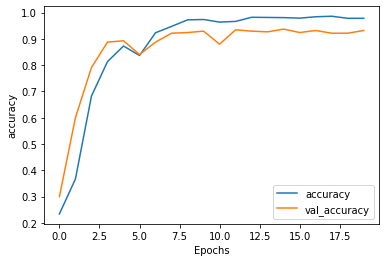

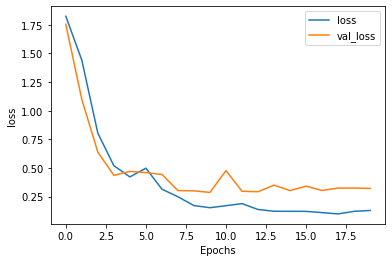

In [54]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [55]:

#save the model in .h5 format

model.save("model.h5")


In [56]:
pwd

'/home/ravikrishnak/Desktop/REsumeclassification/Ravi/Ravi_Latest'

In [57]:
version = 1
MODEL_DIR = 'Resume_Classification_Model'
export_path = os.path.join(MODEL_DIR, str(version))

tf.keras.models.save_model(model = model, filepath = export_path)

!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Resume_Classification_Model/1/assets
total 5004
drwxr-xr-x 2 ravikrishnak primarygroup    4096 May 28 17:09 assets
-rw-r--r-- 1 ravikrishnak primarygroup 5115874 Aug  4 18:47 saved_model.pb
drwxr-xr-x 2 ravikrishnak primarygroup    4096 Aug  4 18:47 variables


In [57]:
!saved_model_cli show --dir {export_path} --all

2020-06-19 10:37:27.391611: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2020-06-19 10:37:27.391719: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2020-06-19 10:37:27.391738: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_

In [58]:
pwd

'/home/ravikrishnak/Desktop/REsumeclassification/Ravi/Ravi_Latest'

In [59]:
model.save('./Model_save_NoLR',save_format='tf')

INFO:tensorflow:Assets written to: ./Model_save_NoLR/assets


In [60]:
# zipping files generated by model.save
!zip -r ./Model_save_NoLR.zip //home/ravikrishnak/Model_save_NoLR

updating: Model_save_NoLR/ (stored 0%)
updating: Model_save_NoLR/saved_model.pb (deflated 90%)
updating: Model_save_NoLR/variables/ (stored 0%)
updating: Model_save_NoLR/variables/variables.data-00000-of-00001 (deflated 6%)
updating: Model_save_NoLR/variables/variables.index (deflated 69%)
updating: Model_save_NoLR/assets/ (stored 0%)


In [61]:
#saving weights
model.save_weights('./Resume_save_weights')

In [62]:
loaded_model = tf.keras.models.load_model('Model_save_NoLR')

In [63]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 431,814
Trainable params: 431,814
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Compare the model weights before loading and after loading the models.
assert len(model.weights) == len(loaded_model.weights)
for a, b in zip(model.weights, loaded_model.weights):
  np.testing.assert_allclose(a.numpy(), b.numpy())

In [65]:
print('\n','-'*50)


 --------------------------------------------------


In [77]:
# Prediction using loaded model
# Give the Path of our Data
Path_Of_Data = '/home/ravikrishnak/Desktop/REsumeclassification/Unseen_Resumes'
# Extract the Labels from the Folders inside the Path mentioned above
Unique_Labels_List = os.listdir(Path_Of_Data)
print(Unique_Labels_List)


['Civil', 'Python', 'SAP', 'Mechanical', 'Networking', 'Testing']


In [78]:
def Pre_Process_Data_And_Create_BOW(folder_path):
  #creating empty lists in order to Create Resume Text and the respective Label
  Resumes_List = [] 
  Labels_List = []
  for EachLabel in Unique_Labels_List:      
      for root, dirs, files in os.walk(os.path.join(folder_path, EachLabel),topdown=False):
        for file in files:
          i = 0
          if file.endswith('.pdf'):
            Full_Resume_Path = os.path.join(root, file)
            file_data = parser.from_file(Full_Resume_Path)
            Resume_Text = file_data['content']
            
            # Below Code removes the Hyperlinks in the Resume, like LinkedIn Profile, Certifications, etc..
            HyperLink_Regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
            Text_Without_HL = re.sub(HyperLink_Regex, ' ', Resume_Text, flags=re.MULTILINE)

            # Below Code removes the Date from the Resume
            Date_regEx = r'(?:\d{1,2}[-/th|st|nd|rd\s]*)?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)?[a-z\s,.]*(?:\d{1,2}[-/th|st|nd|rd)\s,]*)+(?:\d{2,4})+'
            CleanedText = re.sub(Date_regEx,' ',Text_Without_HL)

            List_Of_All_Punctuations = list(string.punctuation)
            Important_Punctuations = ['#', '.', '+' , '-'] #Add more, if any other Punctuation is observed as Important
            NewLineChar = '\n'
            Total_Punct = len(List_Of_All_Punctuations)
            for EachImpPunct in Important_Punctuations:
                for CountOfPunct in range(Total_Punct):
                    if CountOfPunct == Total_Punct:
                        break
                    elif EachImpPunct == List_Of_All_Punctuations[CountOfPunct]:
                        del List_Of_All_Punctuations[CountOfPunct]
                        Total_Punct = Total_Punct - 1
            List_Of_All_Punctuations.append(NewLineChar)
            for EachPunct in List_Of_All_Punctuations:
                CleanedText = CleanedText.replace(EachPunct, " ")
            
            Final_Cleaned_Resume_Text = CleanedText.lower()
            for word in STOPWORDS:
                stop_token = word
                Resume_Text = Final_Cleaned_Resume_Text.replace(stop_token, ' ')
            Resumes_List.append(Resume_Text)
            Labels_List.append(EachLabel)
  return Resumes_List, Labels_List

In [79]:
"""
def Pre_Process_Tokenize_And_Pad(FilePath):
  Resumes_List = []
  if FilePath.endswith('.pdf'):
    Full_Resume_Path = FilePath
    file_data = parser.from_file(Full_Resume_Path)
    Resume_Text = file_data['content']
    Resumes_List.append(Resume_Text)
    vocab_size = 5000
    embedding_dim = 64
    max_length = 800
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = '<OOV>'

    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(Resumes_List)
    word_index = tokenizer.word_index

    Predict_Sequences = tokenizer.texts_to_sequences(Resumes_List)

    Predict_Padded = pad_sequences(Predict_Sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  return Predict_Padded
  
"""

"\ndef Pre_Process_Tokenize_And_Pad(FilePath):\n  Resumes_List = []\n  if FilePath.endswith('.pdf'):\n    Full_Resume_Path = FilePath\n    file_data = parser.from_file(Full_Resume_Path)\n    Resume_Text = file_data['content']\n    Resumes_List.append(Resume_Text)\n    vocab_size = 5000\n    embedding_dim = 64\n    max_length = 800\n    trunc_type = 'post'\n    padding_type = 'post'\n    oov_tok = '<OOV>'\n\n    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)\n    tokenizer.fit_on_texts(Resumes_List)\n    word_index = tokenizer.word_index\n\n    Predict_Sequences = tokenizer.texts_to_sequences(Resumes_List)\n\n    Predict_Padded = pad_sequences(Predict_Sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)\n    train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)\n\n  return Predict_Padded\n  \n"

In [80]:
#calling the function and passing the path
Resumes_List,  Labels_List = Pre_Process_Data_And_Create_BOW(Path_Of_Data)

In [81]:
newresumes = list (zip(Resumes_List,  Labels_List))

In [82]:
df1 = pd.DataFrame(newresumes)

In [83]:
print(df1)

                                                    0        1
0      …   … 1 3  current designation  senior mana...    Civil
1      …   … 1 2  current designation  senior civi...    Civil
2      …   … 1 2  current designation  sr.engineer...    Civil
3      …   … 1 2  current designation  project eng...    Civil
4      …   … 1 2  current designation  resident en...    Civil
..                                                ...      ...
85     …   … 1 2  current designation  automation ...  Testing
86     …   … 1 4  current designation  senior test...  Testing
87     …   … 1 3  current designation  senior test...  Testing
88     …   … 1 4  current designation  senior soft...  Testing
89     …   … 1 4  current designation  test lead  ...  Testing

[90 rows x 2 columns]


In [84]:
print("Total Number of Classes are ", len(Unique_Labels_List))
print("Total Number of Resumes are ", len(Resumes_List))
print("Total Number of Labels are ", len(Labels_List))

Total Number of Classes are  6
Total Number of Resumes are  90
Total Number of Labels are  90


In [85]:
Total_Number_Of_Resumes = len(Resumes_List)
Count = 0
for Each_Resume in Resumes_List:    
    for Instance_Count in range(Count+1, Total_Number_Of_Resumes):
      #print(Instance_Count)
      if Instance_Count == Total_Number_Of_Resumes:
          break
      elif Each_Resume == Resumes_List[Instance_Count]:
        del Resumes_List[Instance_Count]
        del Labels_List[Instance_Count]
        Total_Number_Of_Resumes = Total_Number_Of_Resumes - 1
    Count = Count + 1

In [86]:
vocab_size = 5000
embedding_dim = 64
max_length = 800
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.8 #.8

In [87]:
Train_Resume_Size = int(len(Resumes_List) * training_portion)
Train_Resume_Data, Validation_Resume_Data, Train_Labels, Validation_Labels = \
                    train_test_split(Resumes_List, Labels_List, train_size = training_portion, 
                                     shuffle = True
                                     , stratify= Labels_List)

print('train_size = {}'.format(Train_Resume_Size))
print('Number of Train Resumes = {}'.format(len(Train_Resume_Data)))
print('Number of Train Labels = {}'.format(len(Train_Labels)))
print('Number of Validation Resumes = {}'.format(len(Validation_Resume_Data)))
print('Number of Validation Labels = {}'.format(len(Validation_Labels)))

train_size = 72
Number of Train Resumes = 72
Number of Train Labels = 72
Number of Validation Resumes = 18
Number of Validation Labels = 18


In [88]:
#Loading the tokens of the model before loading

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)

In [89]:
train_sequences = tokenizer2.texts_to_sequences(Train_Resume_Data)
from statistics import mean
print('Average Number of Words in Each Training Resume is {}'.format(mean([len(i) for i in train_sequences])))

Average Number of Words in Each Training Resume is 763.2916666666666


In [90]:
training_label_list = label_tokenizer.texts_to_sequences(Train_Labels)

for x in training_label_list:
  x[0] = x[0] - 1
#training_label_seq = np.hstack(training_label_list)-1

In [91]:
training_label_seq = np.hstack(training_label_list)

In [92]:
training_label_seq

array([5, 2, 0, 5, 0, 5, 4, 3, 4, 2, 1, 5, 2, 2, 1, 2, 4, 5, 0, 4, 5, 4,
       0, 3, 2, 3, 4, 5, 2, 4, 1, 3, 5, 4, 2, 0, 3, 4, 0, 4, 0, 0, 1, 2,
       0, 2, 1, 5, 0, 1, 3, 1, 1, 1, 3, 0, 1, 4, 0, 5, 3, 3, 3, 5, 3, 2,
       2, 5, 1, 4, 3, 1])

In [93]:
Predict_Padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [94]:
Prediction = loaded_model.predict(Predict_Padded)
Prediction_Classes_from_model = loaded_model.predict_classes(Predict_Padded)
Prediction_Classes = tf.argmax(Prediction, axis=1)

In [95]:
Prediction_Classes.numpy()

array([5, 2, 0, 5, 0, 5, 4, 3, 4, 2, 1, 5, 2, 2, 1, 1, 4, 5, 0, 4, 5, 4,
       0, 0, 2, 3, 4, 5, 2, 4, 1, 3, 5, 4, 2, 0, 3, 4, 0, 4, 0, 0, 1, 2,
       0, 2, 1, 5, 0, 1, 3, 1, 1, 1, 3, 0, 1, 4, 0, 5, 3, 3, 3, 5, 3, 2,
       2, 5, 1, 4, 0, 1])

In [96]:
from sklearn.metrics import accuracy_score
#accuracy_score(Prediction_Classes, train_sequences)

print("Accuracy of Unseendata Train resumes: ",accuracy_score(training_label_seq, Prediction_Classes))

Accuracy of Unseendata Train resumes:  0.9583333333333334


In [97]:
resumestest = list (zip(Train_Resume_Data,  Train_Labels))

In [ ]:
dftest = pd.DataFrame(resumestest)

In [ ]:
print(dftest)

In [ ]:
Train_Resume_Data[1]

In [ ]:
print(Prediction_Classes_from_model)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
co

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score(Prediction_Classes, train_sequences)

accuracy_score(train_sequences, Prediction_Classes)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import confusion_matrix